# CA1 Part A Classification

Name: Ruben Tay <br>
Admin Number: P2222600<br>
Class: DAAA/FT/2A/06

## Problem statement
build a classification model to predict which customer will default their payment in the next month

How is your prediction task defined? And what is the meaning of the output variable?
- The prediction task is to predict which customer will default their payment in the next month.<br/>
The output variable is the "Default payment next month" column, 1 means default (customer will not pay the bill),<br/> 0 means non default (customer will pay the bill).

How do you represent your data as features?
- I imported the dataset into a dataframe and then split the datframe into X and y,<br/> where X is the features and y is the target label.

Did you process the features in any way?
- Yes. I first encoded the categorical data, followed by dropping the unnecessary columns<br/>
and then used a function to find the best scalar to be used in the pipeline.

How did you select which learning algorithms to use?
- Initially I selected the models based on accuracy. However through testing we can see that models did not work very well <br/>so I had to look for other models to continue my testing.

Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
- Yes I scaled the features using Robust scalar after finding which is the best scalar for the models based on the dataset.
- I used gridsearch to find the best hyperparameters too.

How do you evaluate the quality of your system?
- I first did cross validation and compared the scores, followed by using an ROC curve,<br/>AUC curve, Classification Report and then a Learning Curve.

How well does your system compare to a dummy baseline?
- It is more accurate than the dummy baseline and has a higher number of correctly predicted defaults.

Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix.
- The model produces more false positives as compared to true positives

Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier
you are using)
- After doing PCA  (Principal Component Analysis) we can see that the model considers most important is Credit Limit.


## Importing libraries


In [1]:
# Basic python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Model evaluation
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy.stats import uniform

# Data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, Normalizer,  MaxAbsScaler, PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Cross-Validation
from sklearn.model_selection import cross_val_score

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Filter Warning
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore")

# Data Exploration 
Understanding the dataset

Loading credit dataset as credit_df.

In [2]:
credit_df = pd.read_csv('/DAAA_2A06/AIML/CA1/classification/credit_dataset.csv')
credit_df

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1596,480000,female,univeresity,married,35,18214,11031,182123,0,182123,12960,0
1596,1597,150000,female,univeresity,married,37,1184,794,2756,0,2772,0,0
1597,1598,110000,female,post-graduate,single,29,107195,109443,106637,7845,4000,4000,0
1598,1599,240000,male,post-graduate,single,30,7744,7284,11234,7305,11263,10018,0


##### Finding the shape of the dataset


In [3]:
credit_df.shape

(1600, 13)

##### Finding the data types of each column in the dataset

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 162.6+ KB


Finding if there is any null values in the dataset.

In [5]:
credit_df.isnull().sum()

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64

## Features and Labels
Understanding the features and target labels in the credit dataset

#### Features 
- Customer ID:  Unique customer identifier ranging from 1 to 1600
- Credit Limit:     The  credit limit for the customer
- Gender:   Customer gender
- Education:    Customer education level
- Marriage Status:  Customer marital status
- Age:  Rotational Customer age
- Bill_Amount1:     Customer credit card bill amount 1 month ago
- Bill_Amount2:     Customer credit card bill amount 2 month ago
- Bill_Amount3:     Customer credit card bill amount 3 month ago
- Pay_Amount1:  The amount customer paid 1 month ago
- Pay_Amount2:  The amount customer paid 2 month ago
- Pay_Amount3:  The amount customer paid 3 month ago

#### Target Label
-  Default payment next month:  Whether customer will default next month, 1 means default (customer will not pay the bill), 0 means non default (customer will pay the bill)

## Exploratory data analysis

### Visualising Dataset

First we need to see the distribution of the data<br/>
Hence we will be using a histogram to display the distribution of data in each column

<Figure size 640x480 with 0 Axes>

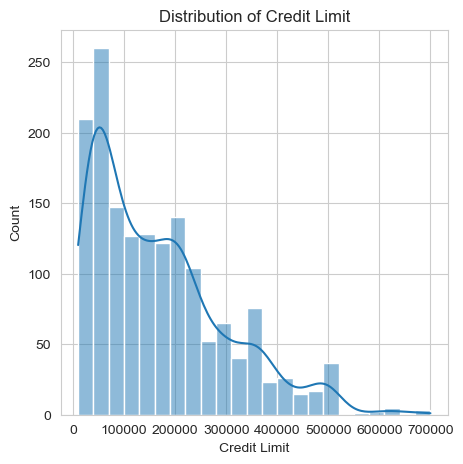

<Figure size 640x480 with 0 Axes>

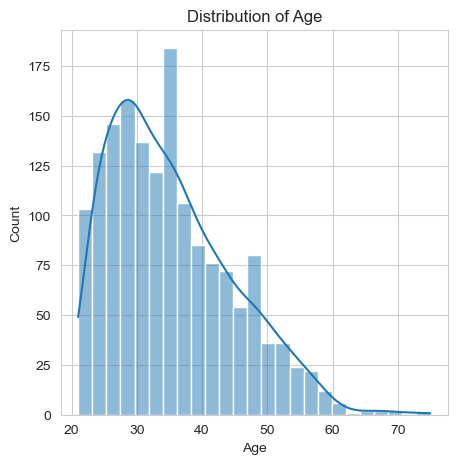

<Figure size 640x480 with 0 Axes>

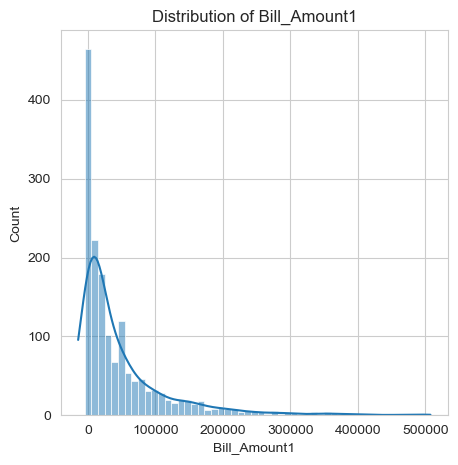

<Figure size 640x480 with 0 Axes>

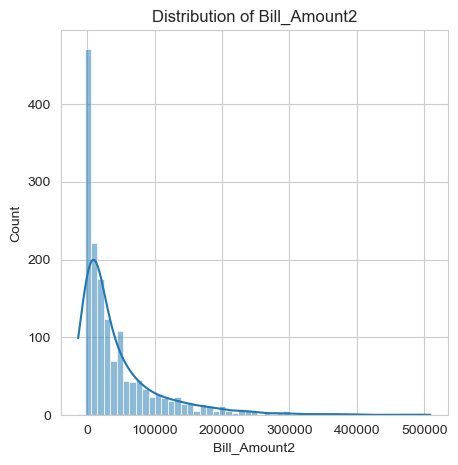

<Figure size 640x480 with 0 Axes>

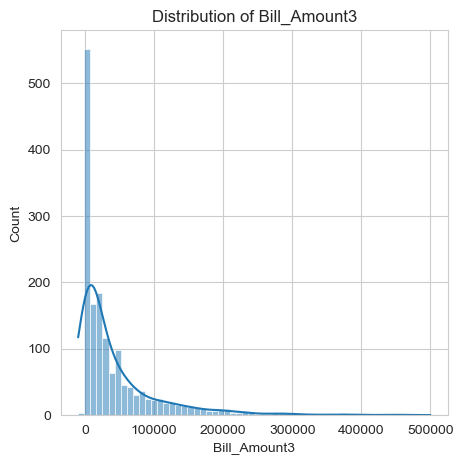

<Figure size 640x480 with 0 Axes>

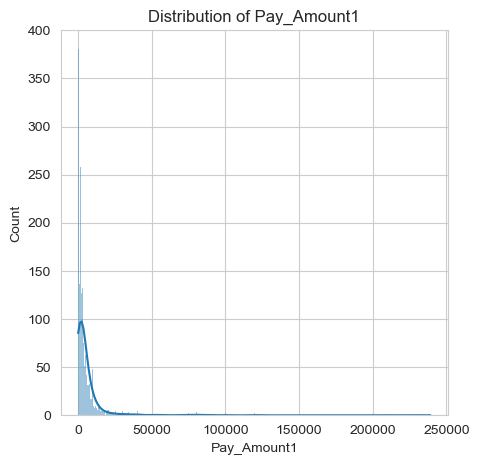

<Figure size 640x480 with 0 Axes>

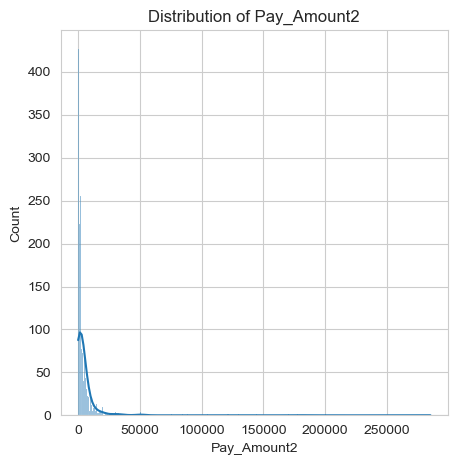

<Figure size 640x480 with 0 Axes>

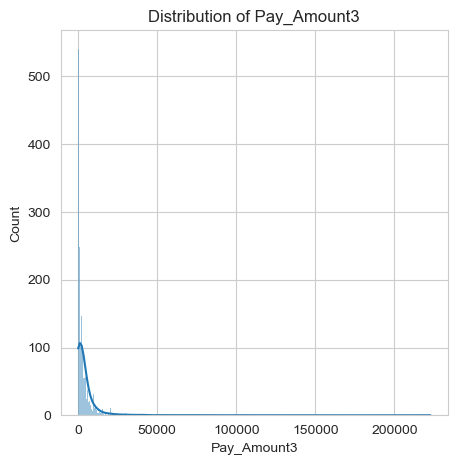

In [6]:
column_names = credit_df.columns[1:-1]

for column in column_names:
    if credit_df[column].dtype == 'int64':
        sns.set_style("whitegrid")
        sns.despine()
        
        plt.figure(figsize=(5,5))
        
        sns.histplot(credit_df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        
        plt.show()

From the Graphs aboove we can see that there is no feature which is normally distributed and most are skewed to the right

#### Barplot to see counts of the various categorical features

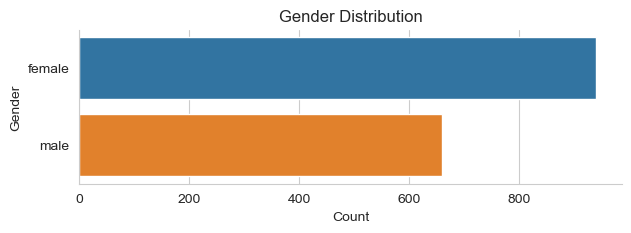

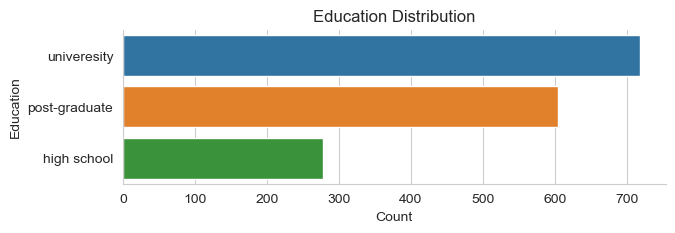

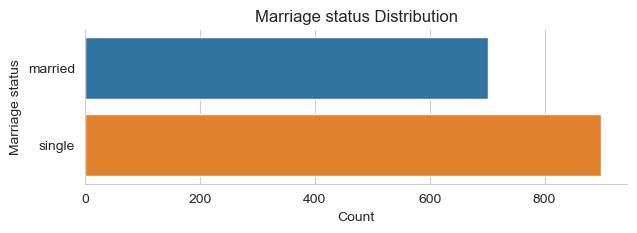

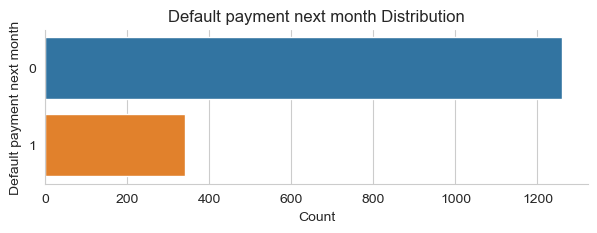

In [7]:
columns_to_plot = ['Gender', 'Education', 'Marriage Status', 'Default payment next month']

for column in columns_to_plot:
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(7,2))
    sns.countplot(y=column, data=credit_df)
    
    plt.xlabel('Count')
    plt.ylabel(column.capitalize())
    plt.title(f'{column.capitalize()} Distribution')
    sns.despine()
        
    plt.show()

Some things to note about the graphs displayed above:
- There are more females than males in the dataset (940 and 640).
- There are most of the customers has university level education followed by post-grad then high school (718, 604, 278).
- More customers are single as compared to being married (899, 701).
- There are also no null values as all the counts add up to 1600.
- Most of the customers do not default their payment.

#### violin plots to visual the data

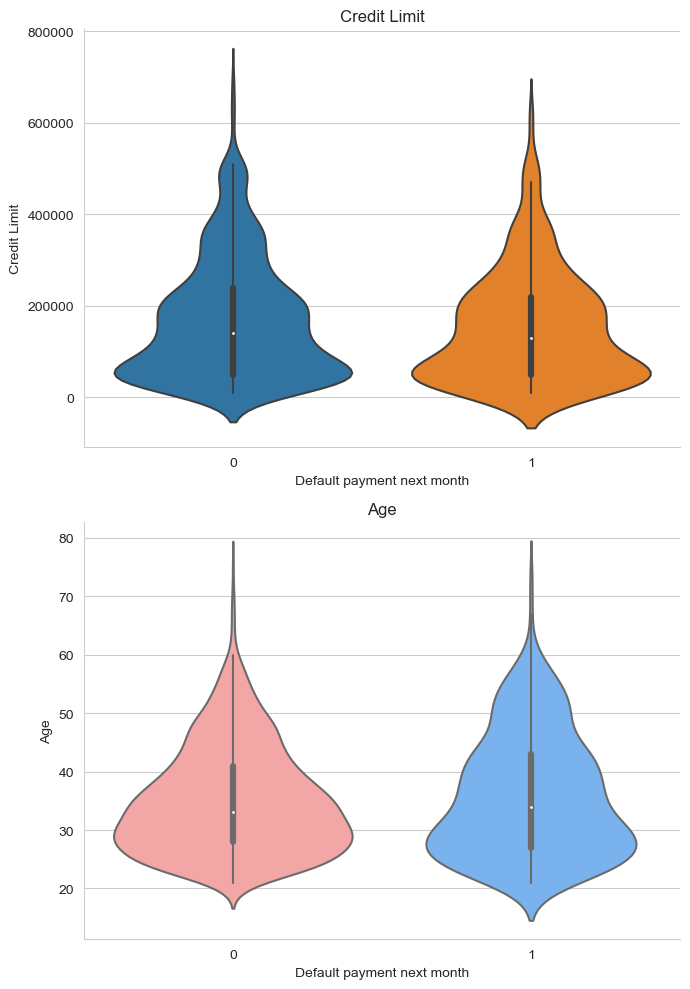

In [8]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(7, 10))

# Plot the first violin plot - Credit Limit
sns.violinplot(ax=axes[0], x="Default payment next month", y="Credit Limit", data=credit_df)
axes[0].set_title("Credit Limit")
axes[0].set_xlabel("Default payment next month")
axes[0].set_ylabel("Credit Limit")

# Plot the second violin plot - Age
colors = ["#FF9999", "#66B2FF"]
sns.violinplot(ax=axes[1], x="Default payment next month", y="Age", data=credit_df, palette=colors)
axes[1].set_title("Age")
axes[1].set_xlabel("Default payment next month")
axes[1].set_ylabel("Age")

sns.despine()
plt.tight_layout()
plt.show()

From the Violinplots above we can see that both Credit Limit and Age cannot be considered a factor of defaulting as both plots have around the same shape.

#### Using a correlation matrix to figure out the correlation between features and the Target Label

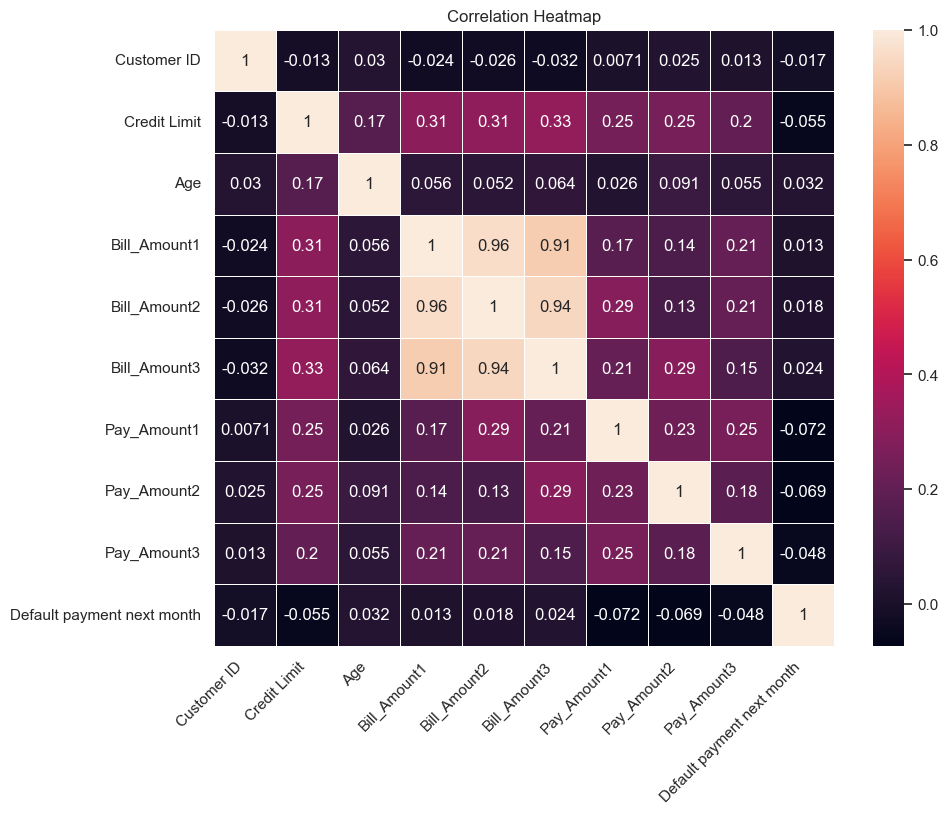

In [9]:
credit_corr = credit_df.corr()

credit_corr
sns.set(style="white")
plt.figure(figsize= (10,8))
sns.heatmap(credit_corr, annot= True, linewidths= 0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
plt.show()

As shown in the correlation matrix above
- Most of the features have a negative correlation with the target label
- Some of the features have very weak positive correlation with the target label

## Data Preprocessing
Preparing our data before we train our algorithm
### Separating the Target Label and Features
Since the values in the Target Label are already 0 and 1, we do not need to use LabelEncoder

In [10]:
X, y = credit_df.drop('Default payment next month', axis = 1), credit_df["Default payment next month"]

Features dataset:

In [11]:
X.head()

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000


Target Label dataset:

In [12]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Default payment next month, dtype: int64

### Encoding Categorical Columns
Since the columns need to be nominally valued we will encode them

In [13]:
# Using pandas get dummies
categorical_columns = ['Gender', 'Marriage Status']
X_dummies = pd.get_dummies(X[categorical_columns], drop_first=True)
X = pd.concat([X.drop(categorical_columns, axis=1), X_dummies], axis=1)

### Label Encoding for education

In [14]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
X['Education'] = labelencoder.fit_transform(X['Education'])


Dataset after encoding:

In [15]:
X

,Customer ID,Credit Limit,Education,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Gender_male,Marriage Status_single
0,1,20000,2,24,3913,3102,689,0,689,0,0,0
1,2,120000,2,26,2682,1725,2682,0,1000,1000,0,1
2,3,90000,2,34,29239,14027,13559,1518,1500,1000,0,1
3,4,50000,2,37,46990,48233,49291,2000,2019,1200,0,0
4,5,50000,2,57,8617,5670,35835,2000,36681,10000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1596,480000,2,35,18214,11031,182123,0,182123,12960,0,0
1596,1597,150000,2,37,1184,794,2756,0,2772,0,0,0
1597,1598,110000,1,29,107195,109443,106637,7845,4000,4000,0,1
1598,1599,240000,1,30,7744,7284,11234,7305,11263,10018,1,1


### Conducting PCA (Principal Component Analysis)
Seeing which features are unnecessary

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

# Fit the PCA model to the data and transform the data
X_pca = pca.fit_transform(X)

# Access the principal components
components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [17]:
feature_names = credit_df.columns[1:] 

# Combine the output values and feature names using zip
data = list(zip(explained_variance_ratio, feature_names))

# Create a DataFrame
df = pd.DataFrame(data, columns=['Explained Variance', 'Feature Name'])

# Print the DataFrame
print(df)

   Explained Variance     Feature Name
0            0.642317     Credit Limit
1            0.322261           Gender
2            0.014858        Education
3            0.008439  Marriage Status
4            0.006778              Age


We can see that the features with the lowest explained variance are Marriage status and Age.

### Dropping features
- We drop the Customer ID, Age, and Marriage Status as the features is have very low percentage of the total variance in the dataset with very little correlation to the Target Label and is not useful to model training and testing

In [18]:
X.drop("Customer ID", axis = 1, inplace=True)
X.drop("Age", axis = 1, inplace=True)
X.drop("Marriage Status_single", axis = 1, inplace=True)

In [19]:
# to check columns have been dropped
X

,Credit Limit,Education,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Gender_male
0,20000,2,3913,3102,689,0,689,0,0
1,120000,2,2682,1725,2682,0,1000,1000,0
2,90000,2,29239,14027,13559,1518,1500,1000,0
3,50000,2,46990,48233,49291,2000,2019,1200,0
4,50000,2,8617,5670,35835,2000,36681,10000,1
...,...,...,...,...,...,...,...,...,...
1595,480000,2,18214,11031,182123,0,182123,12960,0
1596,150000,2,1184,794,2756,0,2772,0,0
1597,110000,1,107195,109443,106637,7845,4000,4000,0
1598,240000,1,7744,7284,11234,7305,11263,10018,1


### Creating Train data and Test data
- We separate the dataset into train data and test data separated by the variables X_train, X_test, y_train, y_test
- We use stratify parameter to ensure that both the training and testing sets have the same proportion of samples from each class
- We use random state to provide reproducibility by ensuring that the random numbers generated during model training<br/>or data processing remain the same across different runs

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, shuffle=True, random_state = 42)

In [21]:
X_train

,Credit Limit,Education,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Gender_male
924,30000,2,27391,28412,28575,1767,1700,1010,0
423,200000,2,104978,105924,102663,4500,0,3500,1
611,360000,1,3280,0,0,0,0,0,0
960,380000,1,8201,7882,-2,39,0,0,1
985,130000,0,1018,6377,-2,6433,2,937,1
...,...,...,...,...,...,...,...,...,...
1246,170000,1,74298,80073,81959,7000,3800,10000,1
11,260000,1,12261,21670,9966,21818,9966,8583,0
981,30000,2,34423,33952,33165,0,0,0,1
414,480000,0,14867,26665,199960,26734,199982,9033,0


### Finding the best scalar for the model
Creating a function to run through 7 different scalars and testing all of them to find the best scalar for each model

In [22]:
def best_scalar_test(model):
    
    model = model   
    # Define the scalers
    scalers = {
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler(),
        'QuantileTransformer': QuantileTransformer(),
        'MaxAbsScaler': MaxAbsScaler(),
        'PowerTransformer': PowerTransformer(),
        'Normalizer': Normalizer()
    }

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Iterate over the scalers
    for scaler_name, scaler in scalers.items():
        # Fit and transform the training data
        X_train_scaled = scaler.fit_transform(X_train)
    
        # Transform the test data
        X_test_scaled = scaler.transform(X_test)
    
        # Train your model on the scaled data
        model.fit(X_train_scaled, y_train)
    
        # Predict on the test data
        y_pred = model.predict(X_test_scaled)
    
        # Generate classification report
        report = classification_report(y_test, y_pred)
    
        # Print the scaler name and classification report
        print(f"Scaler: {scaler_name}")
        print(report)
        print() 
    return

#### We will try to see which are the best scalers using a few test models

Showing the classification reports for the best scalar for Decision Tree

In [23]:
# Decision Tree 
best_scalar_test(DecisionTreeClassifier(max_depth = 10))

Scaler: StandardScaler
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       243
           1       0.42      0.19      0.27        77

    accuracy                           0.74       320
   macro avg       0.60      0.55      0.55       320
weighted avg       0.69      0.74      0.70       320


Scaler: MinMaxScaler
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       243
           1       0.36      0.19      0.25        77

    accuracy                           0.72       320
   macro avg       0.57      0.54      0.54       320
weighted avg       0.68      0.72      0.69       320


Scaler: RobustScaler
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       243
           1       0.39      0.19      0.26        77

    accuracy                           0.73       320
   macro avg       0.59      0.55      0.55       320
weighte

Showing the classification reports for the best scalar for Gaussian Naive Bayes

In [24]:
# Gaussian Naive Bayes
best_scalar_test(GaussianNB())

Scaler: StandardScaler
              precision    recall  f1-score   support

           0       0.81      0.21      0.34       243
           1       0.25      0.84      0.39        77

    accuracy                           0.37       320
   macro avg       0.53      0.53      0.36       320
weighted avg       0.68      0.37      0.35       320


Scaler: MinMaxScaler
              precision    recall  f1-score   support

           0       0.81      0.21      0.34       243
           1       0.25      0.84      0.39        77

    accuracy                           0.37       320
   macro avg       0.53      0.53      0.36       320
weighted avg       0.68      0.37      0.35       320


Scaler: RobustScaler
              precision    recall  f1-score   support

           0       0.81      0.21      0.34       243
           1       0.25      0.84      0.39        77

    accuracy                           0.37       320
   macro avg       0.53      0.53      0.36       320
weighte

From all the classification reports which can be see above we can see that StandardScalar, MinMaxScalar and RobustScalar all are very good for the models.
#### In our case however we should use RobustScalar.
Our dataset has alot of outliers and is heavily skewed thus we should not be using scalars like StandardScalar and MinMaxScalar<br/> as they are sensitive to outliers and is not normally distributed.<br/>
We should use RobustScalar as it scales the features using statistics that are robust to outliers.<br/> It uses median and interquartile range (IQR) to scale data hence making it a good choice for our dataset.
    

### What models should be used for classification

Model Cheatsheet:<br/>
![](https://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet-2.png)

#### Models We are going to use after following the cheatsheet above:

- Kernel SVM
- Random forest
- Neural network
- Gradient boosting tree

This is because we are not really looking for speed but more so the accuracy and reliability of the of the model

## Modelling

Function for ROC curve

In [25]:
def plot_roc(expected, predicted):
    # fpr false positive rate
    # tpr true positive rate
    
    fpr, tpr, _ = roc_curve(expected, predicted)
    roc_auc = auc(fpr, tpr)
    
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(4,4))
    
    plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    
    plt.legend(loc="lower right")
    
    plt.fill_between(fpr, tpr, alpha=0.2)

    plt.show()

Function to output the results for our model

In [26]:
def results(expected, predicted, model):
    
    print(f'Classification report:\n{metrics.classification_report(expected, predicted)}')
    print(f'Confusion matrix: \n{metrics.confusion_matrix(expected, predicted)}')
    print(f'\nThe train score is: {model.score(X_train, y_train)}\n')
    print(f'\nThe test score is: {model.score(X_test, y_test)}\n')
    
    return

### Creating a Pipeline
- We use a scikit-learn pipeline to automatically apply data preprocessing steps and uses the trained model for prediction.
- Using a pipeline helps ensure that there is no data leakage when training and evaluating our models through cross validation.

In [27]:
data_preprocess_steps = [
    ('Feature Scaling', RobustScaler()),
    ('Model'),
]

step = len(data_preprocess_steps) -1

### Training Models

### Dummy Classifier

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       252
           1       0.00      0.00      0.00        68

    accuracy                           0.79       320
   macro avg       0.39      0.50      0.44       320
weighted avg       0.62      0.79      0.69       320

Confusion matrix: 
[[252   0]
 [ 68   0]]

The train score is: 0.7875


The test score is: 0.7875



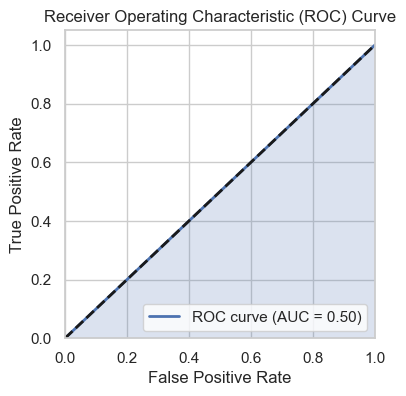

In [28]:
# Dummy Classifier
data_preprocess_steps[step] = ('Model', DummyClassifier())

DummyClass = Pipeline(data_preprocess_steps)
DummyClass.fit(X_train, y_train)

expected, predicted = y_test, DummyClass.predict(X_test)

results(expected, predicted, DummyClass)

plot_roc(expected, predicted)

#### Interpreting the scores from the DummyClassifier:
The DummyClassifier is used as a benchmark before we use our other models. <br/>
We can see from the Classification Report that the DummyClassifier has problems predicting class 1 (Customers who default). <br/>
We will now use the other models to compare against the DummyClassifier to see if that model can learn and predict our data correctly.

### Kernel SVM

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       252
           1       0.00      0.00      0.00        68

    accuracy                           0.79       320
   macro avg       0.39      0.50      0.44       320
weighted avg       0.62      0.79      0.69       320

Confusion matrix: 
[[252   0]
 [ 68   0]]

The train score is: 0.78828125


The test score is: 0.7875



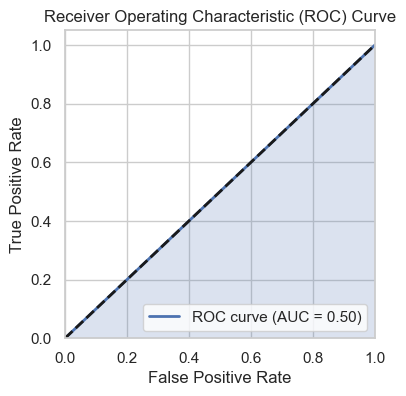

In [29]:
# Kernel SVM
data_preprocess_steps[step] = ('Model', SVC(random_state = 42))

SVM = Pipeline(data_preprocess_steps)
SVM.fit(X_train, y_train)

expected, predicted = y_test, SVM.predict(X_test)

results(expected, predicted, SVM)

plot_roc(expected, predicted)

### Random Forest

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       252
           1       0.32      0.13      0.19        68

    accuracy                           0.76       320
   macro avg       0.56      0.53      0.52       320
weighted avg       0.70      0.76      0.71       320

Confusion matrix: 
[[233  19]
 [ 59   9]]

The train score is: 0.99609375


The test score is: 0.75625



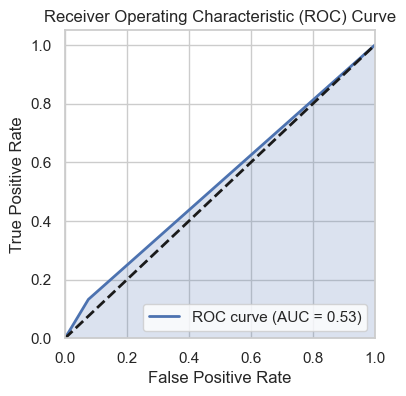

In [30]:
# Random Forest
data_preprocess_steps[step] = ('Model', RandomForestClassifier(random_state = 42))

RandForest = Pipeline(data_preprocess_steps)
RandForest.fit(X_train, y_train)

expected, predicted = y_test, RandForest.predict(X_test)

results(expected, predicted, RandForest)

plot_roc(expected, predicted)

### Neural Network

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       252
           1       0.00      0.00      0.00        68

    accuracy                           0.78       320
   macro avg       0.39      0.50      0.44       320
weighted avg       0.62      0.78      0.69       320

Confusion matrix: 
[[251   1]
 [ 68   0]]

The train score is: 0.7890625


The test score is: 0.784375



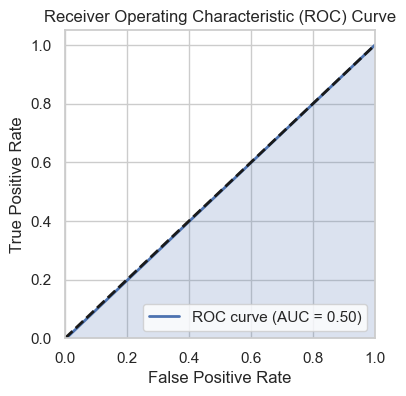

In [31]:
# Neural Network
data_preprocess_steps[step] = ('Model', MLPClassifier(hidden_layer_sizes=(10,)))

NeuralNet = Pipeline(data_preprocess_steps)
NeuralNet.fit(X_train, y_train)

expected, predicted = y_test, NeuralNet.predict(X_test)

results(expected, predicted, NeuralNet)

plot_roc(expected, predicted)

### Gradient Boosting Tree

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       252
           1       0.46      0.09      0.15        68

    accuracy                           0.78       320
   macro avg       0.63      0.53      0.51       320
weighted avg       0.73      0.78      0.72       320

Confusion matrix: 
[[245   7]
 [ 62   6]]

The train score is: 0.84296875


The test score is: 0.784375



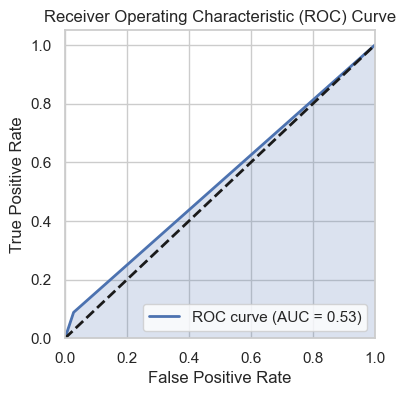

In [32]:
# Gradient Boosting Tree
data_preprocess_steps[step] = ('Model', GradientBoostingClassifier(n_estimators=100))

GradBoost = Pipeline(data_preprocess_steps)
GradBoost.fit(X_train, y_train)

expected, predicted = y_test, GradBoost.predict(X_test)

results(expected, predicted, GradBoost)

plot_roc(expected, predicted)

#### Conclusion after first 4 models
After training the models based on the Model cheatsheet, the models we have tested are not good for our objective.<br/>
Why? This is because we are looking for correct predictions of default (1 in the classification report.). <br/>
However from the models tested we can see that the models while having a good score, is unable to predict customers who default. <br/>
Hence we are going to train more models in hope to find a better one.


#### Other Models that we are going to use:
- K-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Tree
- Gaussian Naive Bayes

### K-Nearest Neighbors (KNN)

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86       252
           1       0.21      0.04      0.07        68

    accuracy                           0.76       320
   macro avg       0.50      0.50      0.47       320
weighted avg       0.67      0.76      0.70       320

Confusion matrix: 
[[241  11]
 [ 65   3]]

The train score is: 0.81796875


The test score is: 0.7625



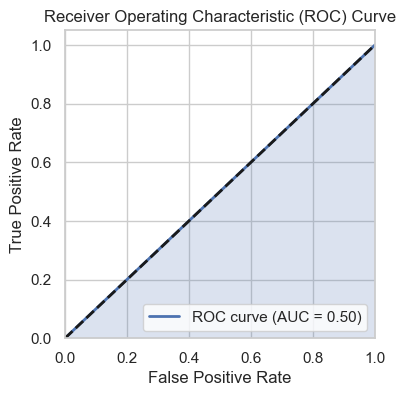

In [33]:
# K-Nearest Neighbors (KNN)
data_preprocess_steps[step] = ('Model', KNeighborsClassifier(n_neighbors=5))

KNN = Pipeline(data_preprocess_steps)
KNN.fit(X_train, y_train)

expected, predicted = y_test, KNN.predict(X_test)

results(expected, predicted, KNN)

plot_roc(expected, predicted)

### Logistic Regression


Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       252
           1       0.00      0.00      0.00        68

    accuracy                           0.78       320
   macro avg       0.39      0.50      0.44       320
weighted avg       0.62      0.78      0.69       320

Confusion matrix: 
[[251   1]
 [ 68   0]]

The train score is: 0.7890625


The test score is: 0.784375



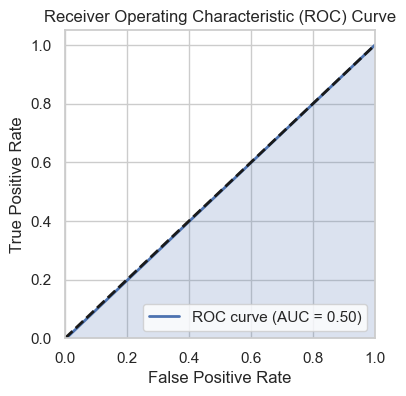

In [34]:
# Logistic Regression
data_preprocess_steps[step] = ('Model', LogisticRegression(random_state = 42))

LogReg = Pipeline(data_preprocess_steps)
LogReg.fit(X_train, y_train)

expected, predicted = y_test, LogReg.predict(X_test)

results(expected, predicted, LogReg)

plot_roc(expected, predicted)

### Decision Tree


Classification report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       252
           1       0.28      0.21      0.24        68

    accuracy                           0.72       320
   macro avg       0.54      0.53      0.53       320
weighted avg       0.69      0.72      0.70       320

Confusion matrix: 
[[216  36]
 [ 54  14]]

The train score is: 0.91640625


The test score is: 0.71875



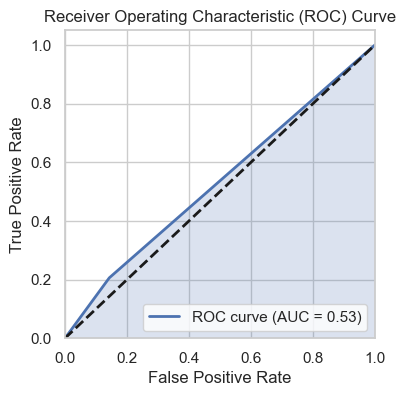

In [35]:
# Decision Tree
data_preprocess_steps[step] = ('Model', DecisionTreeClassifier(max_depth = 10))

DecisionTree = Pipeline(data_preprocess_steps)
DecisionTree.fit(X_train, y_train)

expected, predicted = y_test, DecisionTree.predict(X_test)

results(expected, predicted, DecisionTree)

plot_roc(expected, predicted)

### Gaussian Naive Bayes

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.22      0.35       252
           1       0.22      0.82      0.35        68

    accuracy                           0.35       320
   macro avg       0.52      0.52      0.35       320
weighted avg       0.70      0.35      0.35       320

Confusion matrix: 
[[ 56 196]
 [ 12  56]]

The train score is: 0.378125


The test score is: 0.35



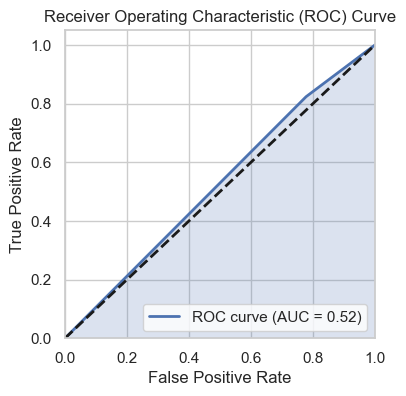

In [36]:
# Gaussian Naive Bayes
data_preprocess_steps[step] = ('Model', GaussianNB())

Gaussian = Pipeline(data_preprocess_steps)
Gaussian.fit(X_train, y_train)

expected, predicted = y_test, Gaussian.predict(X_test)

results(expected, predicted, Gaussian)

plot_roc(expected, predicted)

## Model Selection

- We can see that the top 3 models with highest scores are Random Forest Classifier, Support Vector Classification and KNeighbors Classifier.
However if we take a closer look at the classification report in the above analysis this is not what we are looking for.
- Since our goal is to predict which customer will default their payment in the next month, We have to look at the prediction for defaults.
- From the classification report of each model, we can observe that while the score of the model is high, the f1-score for 1 (Customer defaults) is very low or even just 0, while the f1-score for 0 is very high, which is the opposite of what we want.
- Therefore by looking at the models, we have to find the models which produces the highest f1-score, even though the score might be low.
- Therefore the 3 models chosen are Decision Tree, Guassian Naive Bayes and K-Nearest Neighbours (KNN) as they have the highest precision, recall and f1-score for predictions of customers defaulting.


Hence we will attempt to improve upon Decision Tree, Guassian Naive Bayes and K-Nearest Neighbours (KNN).

# Model Improvement
Our models have a very low accuracy which we will need to improve upon

function to plot confusion matrix

In [37]:
# Confusion matrix function

def confusion_matrix_plot(y_test, y_pred, name):
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return

function for output

In [38]:
def test_results(cv_scores_train,cv_scores_val,y_test, y_pred,model):
    # Print the cross-validation scores
    print("Mean CV Score (Train):", cv_scores_train.mean())
    print("CV Scores (Validation):", cv_scores_val)
    print("Mean CV Score (Validation):", cv_scores_val.mean())
    print("Standard Deviation of CV Scores:", cv_scores_val.std())

    # ROC curve
    plot_roc(y_test, y_pred)

    # Classification report
    print(f'Classification report:\n{classification_report(y_test, y_pred)}')

    # Confusion matrix
    confusion_matrix_plot(y_test, y_pred, model)

    # Learning Curve
    train_sizes, train_scores, val_scores = learning_curve(pipeline, X_train, y_train, cv=5, scoring='recall')

    # Calculate the mean and standard deviation of the scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='b')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std
                 , train_scores_mean + train_scores_std, alpha=0.1, color='b')

    plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='r')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='r')

    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.title(f'Learning Curve for {model}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    return

## Hyperparameter tuning

## Decision Tree

In [39]:
# Track start time
start_time = time.time()

data_preprocess_steps[step] = ('Model', DecisionTreeClassifier())
pipeline = Pipeline(data_preprocess_steps)

# Define the parameter grid for grid search
param_grid = {
    'Model__max_depth': [5, 10, 15, 20],
    'Model__min_samples_split': [5, 10, 15],
    'Model__min_samples_leaf': [5, 10, 15],
    'Model__max_features': ['sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5,scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Set the best parameters in the pipeline
pipeline.set_params(**best_params)

# Perform cross-validation with the best parameters
cv_scores_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring= 'recall')
cv_scores_val = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')

# Train the model with the best parameters
pipeline.fit(X_train, y_train)

# Test the model on the test set
y_pred = pipeline.predict(X_test)

# Time tracked
print(f'\nElapsed Time {time.time() - start_time}\n')

{'Model__max_depth': 20, 'Model__max_features': 'sqrt', 'Model__min_samples_leaf': 5, 'Model__min_samples_split': 5}

Elapsed Time 3.3267853260040283



Mean CV Score (Train): 0.28289562289562287
CV Scores (Validation): [0.25925926 0.25925926 0.14814815 0.30909091 0.27272727]
Mean CV Score (Validation): 0.2496969696969697
Standard Deviation of CV Scores: 0.053950111799141026


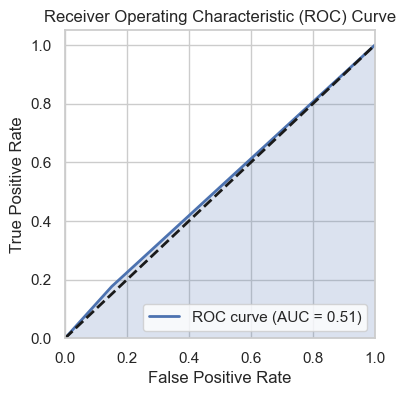

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       252
           1       0.24      0.18      0.20        68

    accuracy                           0.71       320
   macro avg       0.52      0.51      0.51       320
weighted avg       0.68      0.71      0.69       320



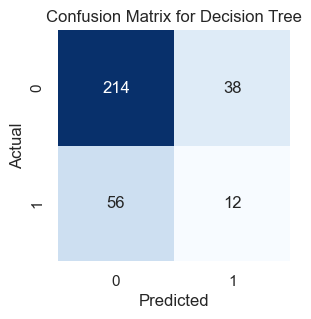

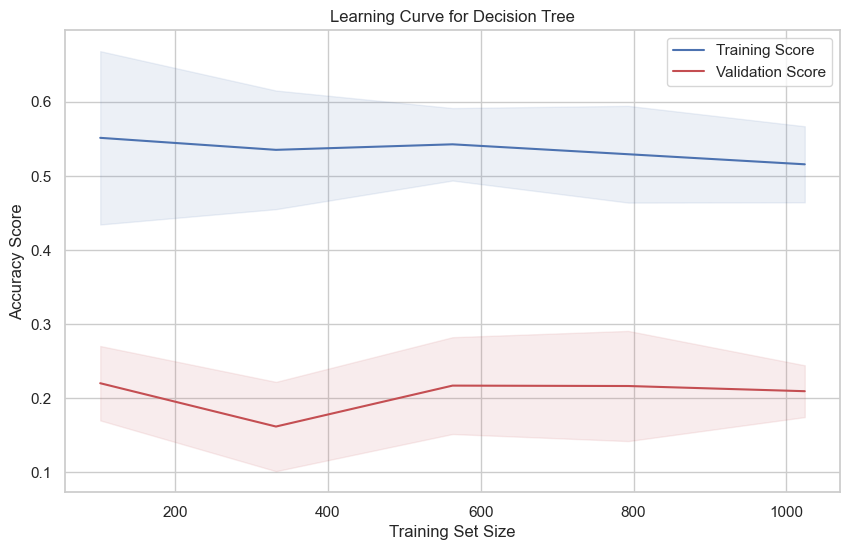

In [40]:
test_results(cv_scores_train,cv_scores_val,y_test, y_pred,'Decision Tree')

## Gaussian Naive Bayes
We use random search on the model

In [41]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Track start time
start_time = time.time()

data_preprocess_steps[step] = ('Model', GaussianNB())
pipeline = Pipeline(data_preprocess_steps)

param_grid = {
    'Model__var_smoothing': uniform(1e-9, 1e-7)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, cv=5, n_iter=10, scoring='recall')
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(best_params)

# Set the best parameters in the pipeline
pipeline.set_params(**best_params)

# Perform cross-validation with the best parameters
cv_scores_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')
cv_scores_val = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='recall')

# Train the model with the best parameters
pipeline.fit(X_train, y_train)

# Test the model on the test set
y_pred = pipeline.predict(X_test)

# Time tracked
print(f'\nElapsed Time {time.time() - start_time}\n')

{'Model__var_smoothing': 2.35425946458891e-08}

Elapsed Time 0.4340963363647461



Mean CV Score (Train): 0.7367003367003366
CV Scores (Validation): [0.85714286 0.85714286 0.57142857 0.69230769 0.84615385]
Mean CV Score (Validation): 0.7648351648351649
Standard Deviation of CV Scores: 0.11516986818966067


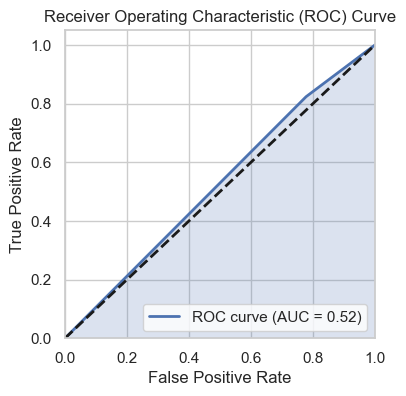

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.22      0.35       252
           1       0.22      0.82      0.35        68

    accuracy                           0.35       320
   macro avg       0.52      0.52      0.35       320
weighted avg       0.70      0.35      0.35       320



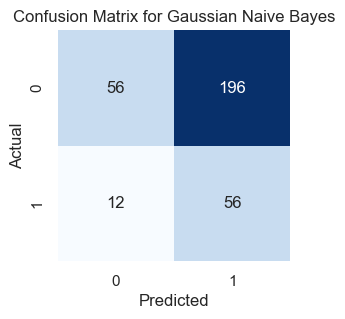

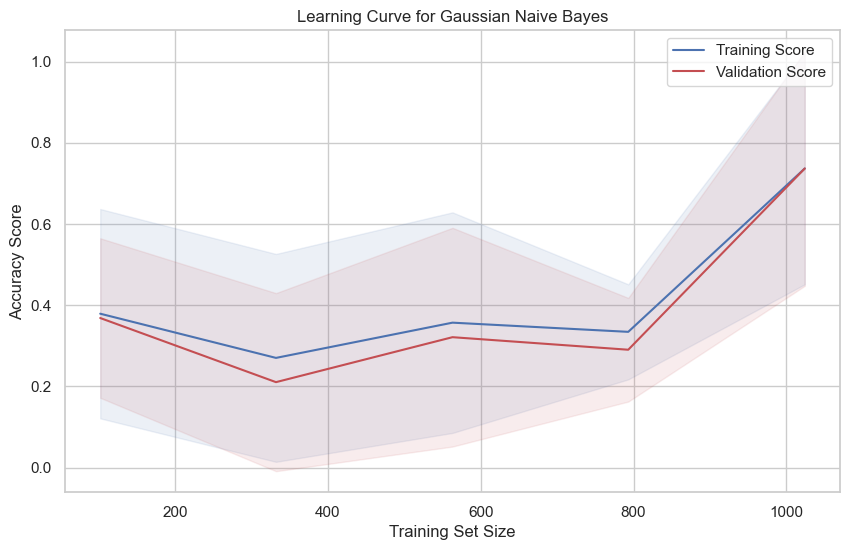

In [42]:
test_results(cv_scores_train,cv_scores_val,y_test, y_pred,'Gaussian Naive Bayes')

## K-Nearest Neighbours (KNN)

In [43]:
# Track start time
start_time = time.time()

data_preprocess_steps[step] = ('Model', KNeighborsClassifier())
pipeline = Pipeline(data_preprocess_steps)

param_grid = {
    'Model__n_neighbors': [0, 5, 10],
    'Model__weights': ['uniform', 'distance'],
    'Model__leaf_size': [0, 10, 20, 30, 40],
    'Model__algorithm': ['ball_tree', 'kd_tree', 'auto'],
    'Model__p': [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Set the best parameters in the pipeline
pipeline.set_params(**best_params)

# Perform cross-validation with the best parameters
cv_scores_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring= 'recall')
cv_scores_val = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')

# Train the model with the best parameters
pipeline.fit(X_train, y_train)

# Test the model on the test set
y_pred = pipeline.predict(X_test)

# Time tracked
print(f'\nElapsed Time {time.time() - start_time}\n')

{'Model__algorithm': 'ball_tree', 'Model__leaf_size': 10, 'Model__n_neighbors': 5, 'Model__p': 1, 'Model__weights': 'distance'}

Elapsed Time 8.182487726211548



Mean CV Score (Train): 0.124983164983165
CV Scores (Validation): [0.12962963 0.14814815 0.09259259 0.16363636 0.09090909]
Mean CV Score (Validation): 0.124983164983165
Standard Deviation of CV Scores: 0.029197491497259948


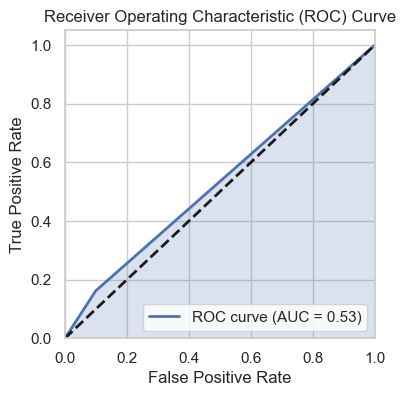

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       252
           1       0.31      0.16      0.21        68

    accuracy                           0.74       320
   macro avg       0.55      0.53      0.53       320
weighted avg       0.69      0.74      0.71       320



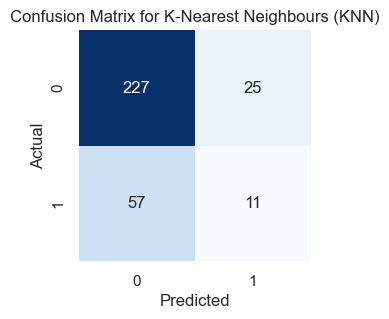

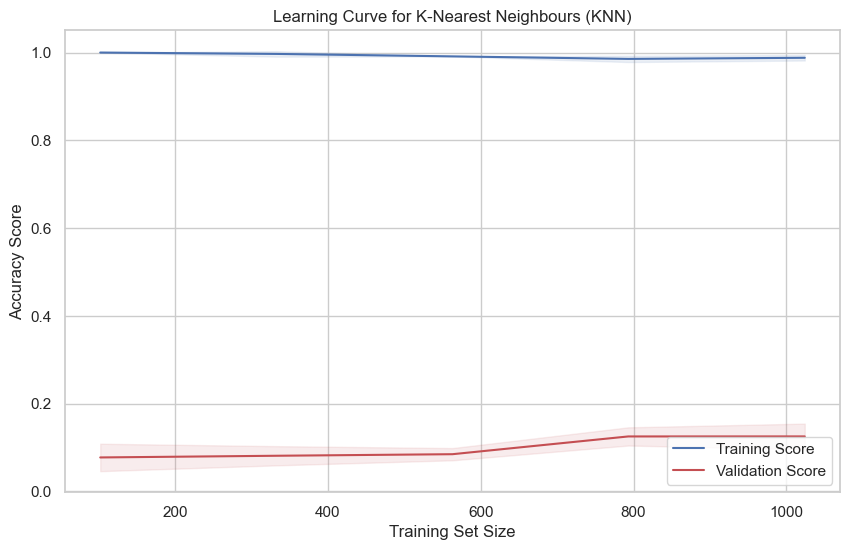

In [44]:
test_results(cv_scores_train,cv_scores_val,y_test, y_pred,'K-Nearest Neighbours (KNN)')

## Model Chosen: Gaussian Naive Bayes
based on our testing, we can see above that even after hyper parameter tuning, the models still did not improve. Our Goal is the predict the number of customers who default and from the classification reports shown above, and we can see that Gaussain Naive Bayes is BEST at predicting the number of customers who default. Even though it predicts most of the customers who did not default and classified them as customers who default.

#### Why are the models so bad at predicting accurately?
- The dataset is extremely skewed, the data does not have a normal distribution.
- The features have very low correlation to the one another and the target label.
- There is not a lot of data to work with so the model might have an increased variability and have limited representation.


#### How can we improve the models?
- One way is to do oversampling, the reason for this is because in the dataset, the data is imbalanced, where the number of defaults vary drastically from number of no defaults.
- Another way is by using ensemble methods such as bagging, boosting, or stacking. This helps to reduce bias, variance and increase overall accuracy of the model.

# Over Sampling using imblearn (Additional)
We are going to try to improve the 3 models by doing over sampling.

### What over sampling method should we use?
We are going to use SMOTE-ENN over Random over sampling. SMOTE-ENN is preferred as it offers a more balanced approach as it combines both oversampling and undersampling, by creating synthetic instances by interpolating between the feature vectors of existing minority class instances. This helps to address the class imbalance while reducing the risk of overfitting. (This is more likely to occur by using random over sampling).

In [72]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Perform oversampling using SMOTEENN on the training set
smote_enn = RandomOverSampler(random_state=20)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

#### Training the models again to see the difference after oversampling

In [73]:
# Dummy Classifier
data_preprocess_steps[step] = ('Model', DummyClassifier())

DummyClass = Pipeline(data_preprocess_steps)
DummyClass.fit(X_train, y_train)

expected, predicted = y_test, DummyClass.predict(X_test)

results(expected, predicted, DummyClass)



# Gaussian Naive Bayes
data_preprocess_steps[step] = ('Model', GaussianNB())

Gaussian = Pipeline(data_preprocess_steps)
Gaussian.fit(X_train, y_train)

expected, predicted = y_test, Gaussian.predict(X_test)

results(expected, predicted, Gaussian)



# Decision Tree
data_preprocess_steps[step] = ('Model', DecisionTreeClassifier(max_depth = 10))

DecisionTree = Pipeline(data_preprocess_steps)
DecisionTree.fit(X_train, y_train)

expected, predicted = y_test, DecisionTree.predict(X_test)

results(expected, predicted, DecisionTree)



# K-Nearest Neighbors (KNN)
data_preprocess_steps[step] = ('Model', KNeighborsClassifier(n_neighbors=5))

KNN = Pipeline(data_preprocess_steps)
KNN.fit(X_train, y_train)

expected, predicted = y_test, KNN.predict(X_test)

results(expected, predicted, KNN)

Classification report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       243
           1       0.00      0.00      0.00        77

    accuracy                           0.76       320
   macro avg       0.38      0.50      0.43       320
weighted avg       0.58      0.76      0.66       320

Confusion matrix: 
[[243   0]
 [ 77   0]]

The train score is: 0.79453125


The test score is: 0.759375

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.21      0.34       243
           1       0.25      0.84      0.39        77

    accuracy                           0.37       320
   macro avg       0.53      0.53      0.36       320
weighted avg       0.68      0.37      0.35       320

Confusion matrix: 
[[ 52 191]
 [ 12  65]]

The train score is: 0.3546875


The test score is: 0.365625

Classification report:
              precision    recall  f1-score   support

           0 

#### We can see above that overall all the models have improved, and we can do hyper parameter tuning again to improve our models.

## Re-testing
#### After Re-training we are going to conduct hyperparameter tuning on the models again and see which models have improved.

## Decision Tree

In [74]:
# Track start time
start_time = time.time()

data_preprocess_steps[step] = ('Model', DecisionTreeClassifier())
pipeline = Pipeline(data_preprocess_steps)

# Define the parameter grid for grid search
param_grid = {
    'Model__max_depth': [5, 10, 15, 20],
    'Model__min_samples_split': [5, 10, 15],
    'Model__min_samples_leaf': [5, 10, 15],
    'Model__max_features': ['sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5,scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Set the best parameters in the pipeline
pipeline.set_params(**best_params)

# Perform cross-validation with the best parameters
cv_scores_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring= 'recall')
cv_scores_val = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='recall')

# Train the model with the best parameters
pipeline.fit(X_train, y_train)

# Test the model on the test set
y_pred = pipeline.predict(X_test)

# Time tracked
print(f'\nElapsed Time {time.time() - start_time}\n')

{'Model__max_depth': 20, 'Model__max_features': 'log2', 'Model__min_samples_leaf': 5, 'Model__min_samples_split': 10}

Elapsed Time 3.28289794921875



Mean CV Score (Train): 0.1634252539912917
CV Scores (Validation): [0.26666667 0.53333333 0.06666667 0.125      0.125     ]
Mean CV Score (Validation): 0.22333333333333333
Standard Deviation of CV Scores: 0.16844055990830184


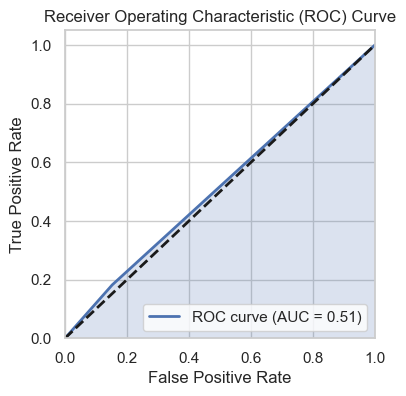

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.80       243
           1       0.27      0.18      0.22        77

    accuracy                           0.69       320
   macro avg       0.52      0.51      0.51       320
weighted avg       0.65      0.69      0.66       320



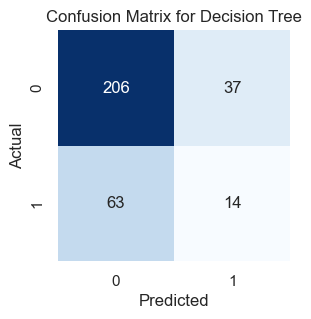

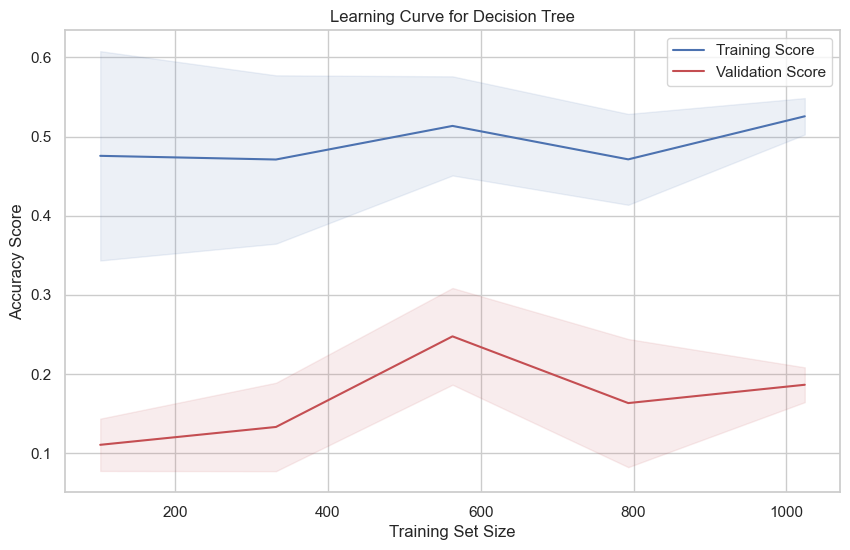

In [75]:
test_results(cv_scores_train,cv_scores_val,y_test, y_pred,'Decision Tree')

## Gaussian Naive Bayes

Gaussian Naive Bayes does not have parameters to tune hence we will just be leaving it as is

In [76]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Track start time
start_time = time.time()

data_preprocess_steps[step] = ('Model', GaussianNB())
pipeline = Pipeline(data_preprocess_steps)

param_grid = {
    'Model__var_smoothing': uniform(1e-9, 1e-7)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, cv=5, n_iter=10, scoring='recall')
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(best_params)

# Set the best parameters in the pipeline
pipeline.set_params(**best_params)

# Perform cross-validation with the best parameters
cv_scores_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')
cv_scores_val = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')

# Train the model with the best parameters
pipeline.fit(X_train, y_train)

# Test the model on the test set
y_pred = pipeline.predict(X_test)

# Time tracked
print(f'\nElapsed Time {time.time() - start_time}\n')

{'Model__var_smoothing': 5.578149123696506e-09}

Elapsed Time 0.4182310104370117



Mean CV Score (Train): 0.8782293178519595
CV Scores (Validation): [0.86538462 0.86538462 0.88679245 0.88679245 0.88679245]
Mean CV Score (Validation): 0.8782293178519595
Standard Deviation of CV Scores: 0.010487655647620279


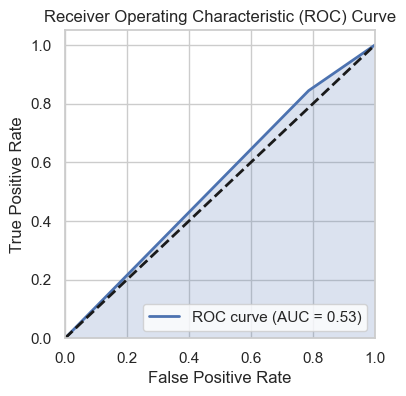

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.21      0.34       243
           1       0.25      0.84      0.39        77

    accuracy                           0.37       320
   macro avg       0.53      0.53      0.36       320
weighted avg       0.68      0.37      0.35       320



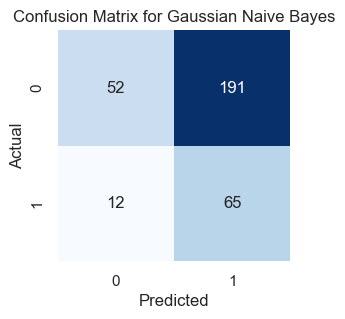

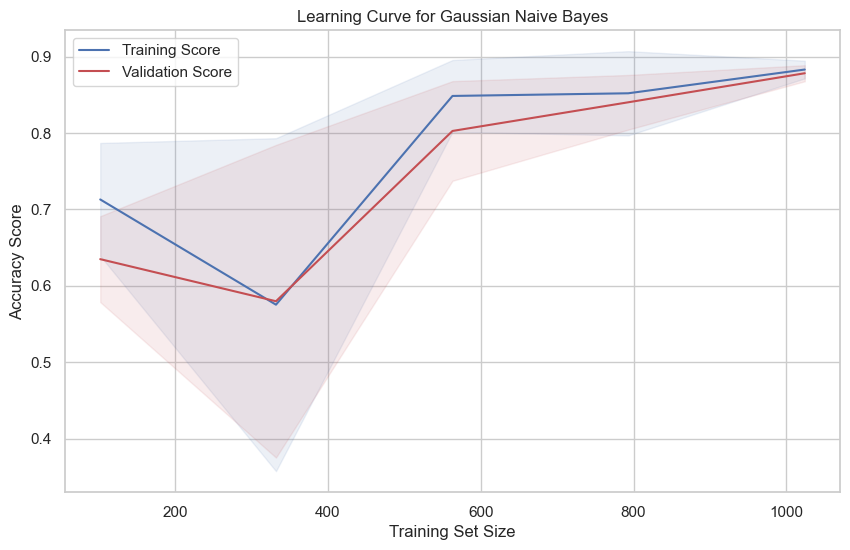

In [77]:
test_results(cv_scores_train,cv_scores_val,y_test, y_pred,'Gaussian Naive Bayes')

## K-Nearest Neighbour (KNN)

In [78]:
# Track start time
start_time = time.time()

data_preprocess_steps[step] = ('Model', KNeighborsClassifier())
pipeline = Pipeline(data_preprocess_steps)

param_grid = {
    'Model__n_neighbors': [0, 5, 10],
    'Model__weights': ['uniform', 'distance'],
    'Model__leaf_size': [0, 10, 20, 30, 40],
    'Model__algorithm': ['ball_tree', 'kd_tree', 'auto'],
    'Model__p': [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Set the best parameters in the pipeline
pipeline.set_params(**best_params)

# Perform cross-validation with the best parameters
cv_scores_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring= 'recall')
cv_scores_val = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='recall')

# Train the model with the best parameters
pipeline.fit(X_train, y_train)

# Test the model on the test set
y_pred = pipeline.predict(X_test)

# Time tracked
print(f'\nElapsed Time {time.time() - start_time}\n')

{'Model__algorithm': 'ball_tree', 'Model__leaf_size': 10, 'Model__n_neighbors': 5, 'Model__p': 1, 'Model__weights': 'distance'}

Elapsed Time 8.670730590820312



Mean CV Score (Train): 0.11763425253991291
CV Scores (Validation): [0.4        0.06666667 0.13333333 0.125      0.25      ]
Mean CV Score (Validation): 0.195
Standard Deviation of CV Scores: 0.1185092588975412


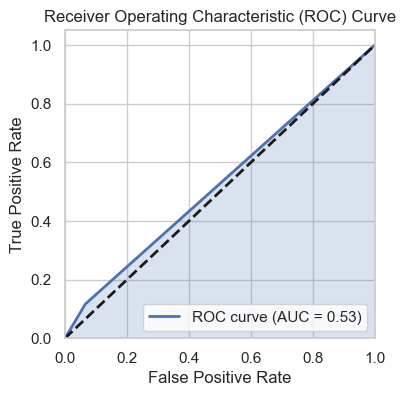

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       243
           1       0.36      0.12      0.18        77

    accuracy                           0.74       320
   macro avg       0.56      0.53      0.51       320
weighted avg       0.67      0.74      0.68       320



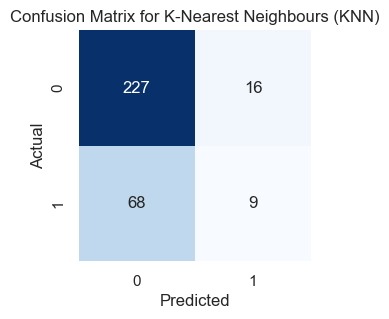

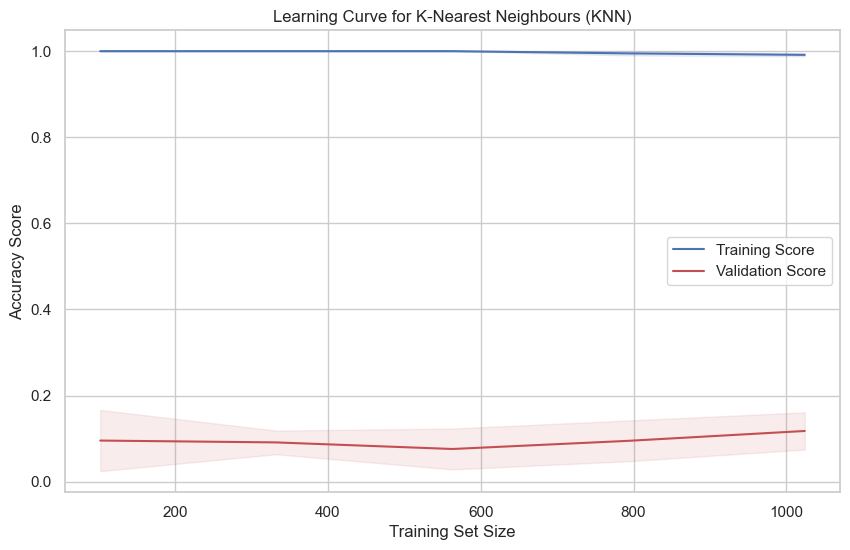

In [79]:
test_results(cv_scores_train,cv_scores_val,y_test, y_pred,'K-Nearest Neighbours (KNN)')

# Conclusion

## Our final model chosen is still Guassian Naive Bayes
We can see that even after oversampling the model still didnt really improve that much. <br/>Like mentioned before, there is a high possiblity that this could be because of the dataset, and the correlation of the features with the target label
